I've solved numerically the eigenvalue problem in two ways: when it's formulated for two velocity components **and** when it's formulated for velocity component and magnetic field component (as Mathieu did). The results of my calculations and the comparison with Mathieu's results are represented below.

I use the finite difference **to discretizate** the derivatives and choose the second order of accuracy. 

### 1. The first system of equations

\begin{equation*}
((\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)^2+Ha^2\bar{\alpha}^2)\bar{u}-\frac{d\bar{U}}{d\bar{z}}(\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)\bar{w}=\bar{\omega}(\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)\bar{u},\\
((\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)^2+Ha^2\bar{\alpha}^2)\bar{w}+2\bar{U}\bar{\alpha}^2G^2\bar{u}=\bar{\omega}(\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)\bar{w},
\end{equation*}
with the boundary conditions:
\begin{equation*}
\bar{u}=0,\quad\frac{d^2\bar{u}}{d\bar{z}^2}=0,\\
\bar{w}=0,\quad\frac{d\bar{w}}{d\bar{z}}=0.
\end{equation*}
 

$\alpha$|$G$ ||$Ha_\delta$|$\bar{\omega}_{Andzej\, code}$|$\bar{\omega}_{my\, code\, 1}$||$Ha_\delta$|$\bar{\omega}_{Andzej\, code}$|$\bar{\omega}_{my\, code\, 1}$||$Ha_\delta$|$\bar{\omega}_{Andzej\, code}$|$\bar{\omega}_{my\, code\, 1}$
--------|----||-----------|------------------------------|--------------------------||----|--------|--------||--|--|--  
0.300   |2.40||    0      |         0.00328              |      0.00318             || 1  |0.00116 |0.00125 ||5 |-0.01164|-0.01068
0.300   |1.60||    0      |         0.00219              |      0.00209             || 1  |-0.00066|-0.00030||5 |-0.01525|-0.01471
0.300   |0.80||    0      |         0.00035              |      0.00028             || 1  |-0.00438|-0.00329||5 |-0.02420|-0.02399
0.300   |0.30||    0      |        -0.00232              |     -0.00236             || 1  |-0.01136|-0.00888||5 |-0.04654|-0.04633
0.200   |1.00||    0      |         0.00107              |      0.00100             || 1  |-0.00201|-0.00226||5 |-0.01189|-0.01376
0.243   |5.12||    0      |         0.00489              |      0.00477             || 1  |0.00380 |0.00338 ||5 |-0.00519|-0.00387
0.276   |6.00||    0      |         0.00569              |      0.00556             || 1  |0.00464 |0.00433 ||5 |-0.00560|-0.00344

The table shows that there is a good agreement between Mathieu's results and mine results. 

### 2. The second system of equations

Mathieu solved the eigenvalue problem for components $\bar{w}$ (z-component of the velocity) and $\bar{\phi}$ (x-component of the magnetic field) with such a system of equations:
\begin{equation*}
((\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)^2+Ha^2\bar{\alpha}^2)\bar{\phi}-\bar{\alpha}\frac{d\bar{U}}{d\bar{z}}\bar{w}=\bar{\omega}(\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)\bar{\phi},\\
((\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)^2+Ha^2\bar{\alpha}^2)\bar{w}+2\bar{U}\bar{\alpha}G^2(\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)\bar{\phi}=\bar{\omega}(\frac{d^2}{d\bar{z}^2}-\bar{\alpha}^2)\bar{w},
\end{equation*}
and the boundary conditions:
\begin{equation*}
\bar{\phi}=0,\quad\frac{d^2\bar{\phi}}{d\bar{z}^2}=0,\\
\bar{w}=0,\quad\frac{d\bar{w}}{d\bar{z}}=0,
\end{equation*}
and gain the next results:

$\alpha$|$G$ ||$Ha_\delta$|$\bar{\omega}_{Andzej\, code}$|$\bar{\omega}_{my\, code\, 2}$||$Ha_\delta$|$\bar{\omega}_{Andzej\, code}$|$\bar{\omega}_{my\, code\, 2}$
--------|----||----|--------|--------||--|--|--  
0.300   |2.40|| 1  |0.00116 |0.00172 ||5 |-0.01164|-0.01038
0.300   |1.60|| 1  |-0.00066|0.00018 ||5 |-0.01525|-0.01448
0.300   |0.80|| 1  |-0.00438|-0.00280||5 |-0.02420|-0.02389
0.300   |0.30|| 1  |-0.01136|-0.00847||5 |-0.04654|-0.04632
0.200   |1.00|| 1  |-0.00201|-0.00126||5 |-0.01189|-0.01364
0.243   |5.12|| 1  |0.00380 |0.00395 ||5 |-0.00519|-0.00329
0.276   |6.00|| 1  |0.00464 |0.00480 ||5 |-0.00560|-0.00284

I attach my code below **to plot pertrubation velocity components $u, v, w$** with fixed $G$ and $\alpha$. 

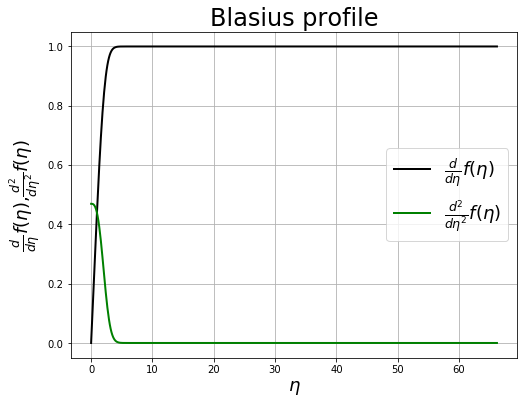

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

etalim=66.3
N=500

def f(y,t):
    y1,y2,y3=y
    return [y2,y3,-y3*y1]

t=np.arange(0,etalim,etalim/N)
y0=[0,0,0.469]

#built-in method BDF allows to solve stiff systems of differential equations
[y1,y2,y3]=odeint(f,y0,t,full_output=False).T

%matplotlib inline

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(t,y2,'-k',linewidth=2,label='$\\frac{d}{d \\eta} f{\\left (\\eta \\right )}$')
ax.plot(t,y3,'-g',linewidth=2,label='$\\frac{d^{2}}{d \\eta^{2}}  f{\\left (\\eta \\right )}$')
plt.ylabel('$\\frac{d}{d \\eta} f{\\left (\\eta \\right )}$,$\\frac{d^{2}}{d \\eta^{2}}  f{\\left (\\eta \\right )}$',\
           fontsize=18)
plt.xlabel('$\\eta$',fontsize=18)
plt.legend(fontsize=18,loc='center right')
plt.title('Blasius profile',fontsize=24)
ax.grid(True)

In [2]:
from math import *
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

%matplotlib inline

U0=500 #dimensional free-stream velocity [cm/s]
V=0.15 #dimensional kinetic viscosity [cm**2/s]
R=320 #dimensional radius of curvature [cm]
G=6 #Goertler number
alph=0.276 #normalized wavenumber as in Liu's paper

theta=(G**2*V**2*R/U0**2)**(1/3)#;print('theta',theta,sep='=') #momentum thickness
delta=theta*sqrt(2)/0.664#; print('delta',delta,sep='=') #boundary layer thickness if factor 2 is considered
#x0=(G*V**(1/4)*sqrt(R)/(U0**(1/4)*(0.664)**(3/2)))**(4/3); print('x0',x0,sep='=') #distance from the edge 
#delta=sqrt(2*V*x0/U0)
alpha=alph*delta/theta#;print('alpha',alpha,sep='=') #normalized wavenumber
h=etalim/N #step

K12=U0*delta/V #coefficient of matrix A12
K21=K12*2*alpha**2*h**4

A11=np.eye(N-2,N-2);A11=A11*(-2-alpha**2*h**2)
for k in range(1,N-2):
    A11[k][k-1]=1
    A11[k-1][k]=1
    
A12=np.zeros((N-2,N-4))
for k in range(0,N-4):
    A12[k+1][k]=y3[k+2]

A21=np.zeros((N-4,N-2))
for k in range(0,N-4):
    A21[k][k+1]=y2[k+2]/(R/delta-t[k+2])
    
A22=np.dot(A11,A11);A22=np.delete(A22,[0,N-3],0);A22=np.delete(A22,[0,N-3],1)

A12=A12*(-K12)*h**2;A21=A21*K21

A1=np.hstack((A11,A12));A2=np.hstack((A21,A22));A=np.vstack((A1,A2))

B11=np.eye(N-2,N-2);B11=B11*h**2*delta**2/V
B12=np.zeros((N-2,N-4));B21=np.zeros((N-4,N-2))
B22=A11*delta**2*h**2/V;
B22=np.delete(B22,[0,N-3],0);B22=np.delete(B22,[0,N-3],1)

B1=np.hstack((B11,B12));B2=np.hstack((B21,B22));B=np.vstack((B1,B2))

beta,v=la.eig(A,B)
v=np.real(v)
#beta>0 => growth of pertrubation
#beta<0 => decrease of pertrubation
#beta=0 => zero amplification

u=np.zeros((N,));w=np.zeros((N,))
for k in range(1,N-1):
    u[k]=v[k-1][np.argmax(beta)] #for fixed value of growth rate
for k in range(2,N-2):
    w[k]=v[k+N-4][np.argmax(beta)]
w[1]=w[2]/4
w[N-2]=w[N-3]/4

print('G',G,sep='=')
print('alpha(normalized as in the paper)',alph,sep='=')
print('betanorm',np.max(beta)*delta/(sqrt(2)*U0),sep='=')

G=6
alpha(normalized as in the paper)=0.276
betanorm=(0.00556160202938+0j)


In [3]:
from math import *
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from copy import deepcopy

%matplotlib inline

Ha=5 #Hartmann's number  

#Matrix A11
a=np.eye(N,N);a=a*(-2-alpha**2*h**2)
for k in range(1,N):
    a[k-1][k]=1
    a[k][k-1]=1
a[0][0]=2-alpha**2*h**2;a[N-1][N-1]=2-alpha**2*h**2
a[0][1]=-5;a[N-1][N-2]=-5
a[0][2]=4;a[N-1][N-3]=4
a[0][3]=-1;a[N-1][N-4]=-1
#print(a)
a2=np.dot(a,a)#;print(a2)
b=np.eye(N,N);b=b*Ha**2*alpha**2*h**4#;print(b)
A11=a2+b;A11=np.delete(A11,[0,1,N-2,N-1],0);A11=np.delete(A11,[0,1,N-2,N-1],1)#;print(A11)

#Matrix A12
c=np.zeros((N,N))
for k in range(0,N):
    c[k][k]=y3[k]
#print(c)
A12=-np.dot(c,a)*h**2*U0*delta/V#;print(A12)
A12=np.delete(A12,[0,1,N-2,N-1],0);A12=np.delete(A12,[0,1,N-2,N-1],1)#;print(A12)

#Matrix A21
A21=np.zeros((N,N))
for k in range(0,N):
    A21[k][k]=y2[k]
A21=A21*2*alpha**2*U0*delta**2*h**4/(R*V)#;print(A21)
A21=np.delete(A21,[0,1,N-2,N-1],0);A21=np.delete(A21,[0,1,N-2,N-1],1)

#Matrix A22
A22=deepcopy(A11)
#A22=np.delete(A22,[0,N-5],0);A22=np.delete(A22,[0,N-5],1)

A1=np.hstack((A11,A12));A2=np.hstack((A21,A22));A=np.vstack((A1,A2))#;print(A)

B11=deepcopy(a)*h**2*delta**2/V;B11=np.delete(B11,[0,1,N-2,N-1],0);B11=np.delete(B11,[0,1,N-2,N-1],1)#;print(B11)

B12=np.zeros((N-4,N-4));B21=np.zeros((N-4,N-4))

B22=deepcopy(B11)
#B22=np.delete(B22,[0,N-5],0);B22=np.delete(B22,[0,N-5],1)

B1=np.hstack((B11,B12));B2=np.hstack((B21,B22));B=np.vstack((B1,B2))

omeganorm,vv=la.eig(A,B)
vv=np.real(vv)

print(np.max(omeganorm))
print(np.max(omeganorm)*delta/(U0*sqrt(2)))

uu=np.zeros((N,));ww=np.zeros((N,))
for k in range(2,N-2):
    uu[k]=vv[k-2][np.argmax(omeganorm)] #for fixed value of growth rate
for k in range(2,N-2):
    ww[k]=vv[k+N-6][np.argmax(omeganorm)]
uu[1]=(4*uu[2]-uu[3])/5
uu[N-2]=(4*uu[N-3]-uu[N-4])/5
ww[1]=ww[2]/4
ww[N-2]=ww[N-3]/4

(-11.2920905922+1.97726850335j)
(-0.00344245231265+0.00060278054595j)


In [4]:
rho=1 #dimensional mass density
eta=1 #dimensional diffusitivity

a=np.eye(N,N);a=a*(-2-alpha**2*h**2)
for k in range(1,N):
    a[k-1][k]=1
    a[k][k-1]=1
a[0][0]=2-alpha**2*h**2;a[N-1][N-1]=2-alpha**2*h**2
a[0][1]=-5;a[N-1][N-2]=-5
a[0][2]=4;a[N-1][N-3]=4
a[0][3]=-1;a[N-1][N-4]=-1
#print(a)
a2=np.dot(a,a)#;print(a2)
b=np.eye(N,N);b=b*Ha**2*alpha**2*h**4#;print(b)
AA11=a2+b;AA11=AA11*sqrt(V*eta/rho)*(1/(Ha*delta*U0))
AA11=np.delete(AA11,[0,1,N-2,N-1],0);AA11=np.delete(AA11,[0,1,N-2,N-1],1)#;print(AA11)

AA12=c;AA12=AA12*(-alpha*h**4)
AA12=np.delete(AA12,[0,1,N-2,N-1],0);AA12=np.delete(AA12,[0,1,N-2,N-1],1)#;print(AA12)

AA21=np.zeros((N,N))
for k in range(0,N):
    AA21[k][k]=y2[k]
AA21=np.dot(AA21,a)*2*alpha*sqrt(eta/rho)*delta**2*U0*h**2/(Ha*R*V**(3/2))
AA21=np.delete(AA21,[0,1,N-2,N-1],0);AA21=np.delete(AA21,[0,1,N-2,N-1],1)#;print(AA21)

AA22=a2+b;AA22=np.delete(AA22,[0,1,N-2,N-1],0);AA22=np.delete(AA22,[0,1,N-2,N-1],1)#;print(AA11)

AA1=np.hstack((AA11,AA12));AA2=np.hstack((AA21,AA22));AA=np.vstack((AA1,AA2))#;print(AA)

BB11=deepcopy(a)*h**2*sqrt(eta/(rho*V))*(delta/(Ha*U0))
BB11=np.delete(BB11,[0,1,N-2,N-1],0);BB11=np.delete(BB11,[0,1,N-2,N-1],1)#;print(BB11)

BB12=np.zeros((N-4,N-4));BB21=deepcopy(BB12)

BB22=deepcopy(a)*delta**2*h**2/V;BB22=np.delete(BB22,[0,1,N-2,N-1],0);BB22=np.delete(BB22,[0,1,N-2,N-1],1)
#;print(A11)

BB1=np.hstack((BB11,BB12));BB2=np.hstack((BB21,BB22));BB=np.vstack((BB1,BB2))

omeganorm2,uuu=la.eig(AA,BB)
uuu=np.real(uuu)

print('Ha',Ha,sep='=')
print('G',G,sep='=')
print('alpha (normalized as in the paper)',alph,sep='=')
print('omeganorm',np.max(omeganorm2)*delta/(U0*sqrt(2)))

Ha=5
G=6
alpha (normalized as in the paper)=0.276
omeganorm (-0.00284438740297+0j)


### Plotting u, v, w

Plotting normalized velocity components $u, v$ and $w$ as the functions of normalized variable $\bar{z}$ for **$G=6$ and $\bar{\alpha}=0.276$**. 

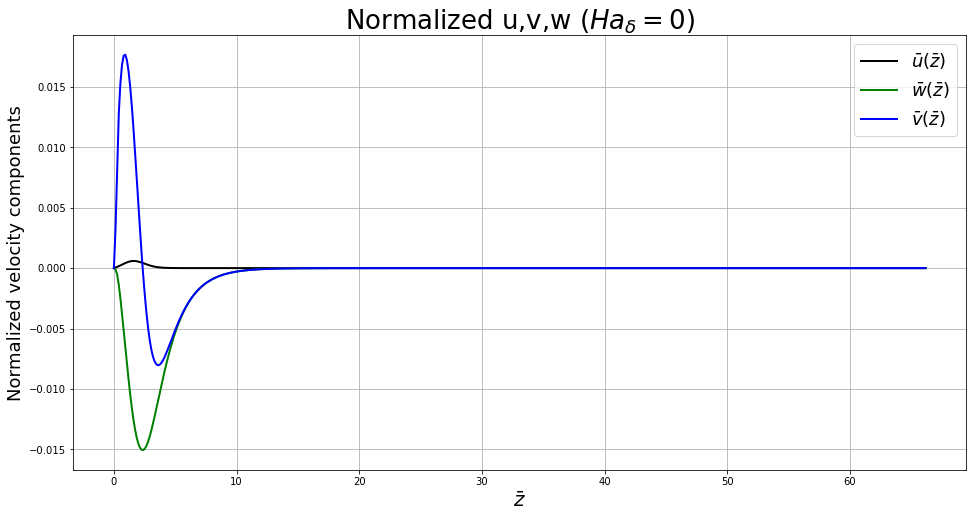

In [5]:
D=np.zeros((N-2,N-2))
for k in range(1,N-2):
    D[k][k-1]=-1/2
    D[k-1][k]=1/2
v1=np.dot(D,w[1:N-1])*(-1/(h*alpha))
v=np.zeros((N,))
for k in range(1,N-1):
    v[k]=v1[k-1]

unorm=(1/U0)*u;vnorm=(delta/V)*v;wnorm=(delta/V)*w

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.plot(t,unorm,'-k',linewidth=2,label='$\\bar{u}(\\bar{z})$')
ax.plot(t,wnorm,'-g',linewidth=2,label='$\\bar{w}(\\bar{z})$')
ax.plot(t,vnorm,'-b',linewidth=2,label='$\\bar{v}(\\bar{z})$')
plt.legend(fontsize=18,loc='upper right')
ax.set_xlabel('$\\bar{z}$',fontsize=20)
ax.set_ylabel('Normalized velocity components',fontsize=18)
ax.set_title('Normalized u,v,w ($Ha_\\delta=0$)',fontsize=26)
ax.grid(True)

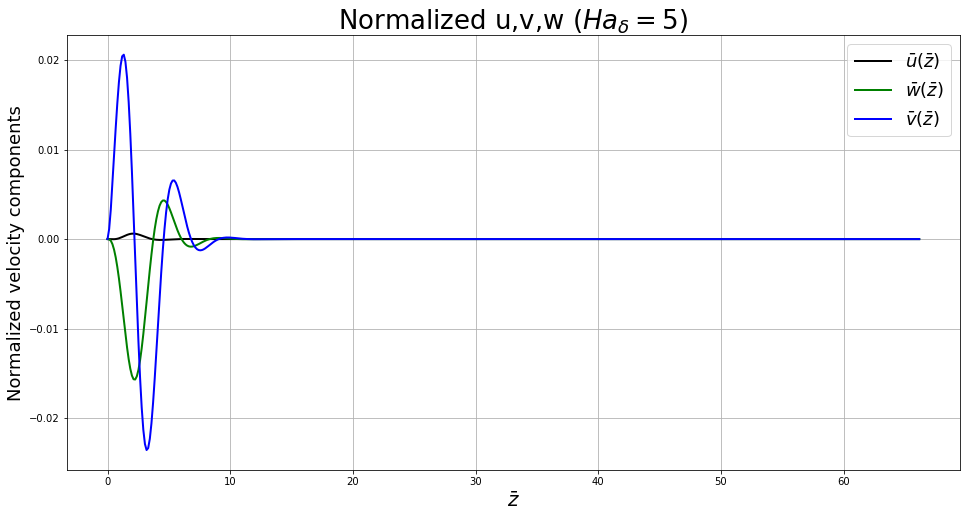

In [6]:
vv1=np.dot(D,ww[1:N-1])*(-1/(h*alpha))
vv=np.zeros((N,))
for k in range(1,N-1):
    vv[k]=vv1[k-1]
    
uunorm=(1/U0)*uu;vvnorm=(delta/V)*vv;wwnorm=(delta/V)*ww

fig=plt.figure(figsize=(16,8))
ax=fig.add_subplot(111)
ax.plot(t,uunorm,'-k',linewidth=2,label='$\\bar{u}(\\bar{z})$')
ax.plot(t,wwnorm,'-g',linewidth=2,label='$\\bar{w}(\\bar{z})$')
ax.plot(t,vvnorm,'-b',linewidth=2,label='$\\bar{v}(\\bar{z})$')
plt.legend(fontsize=18,loc='upper right')
ax.set_xlabel('$\\bar{z}$',fontsize=20)
ax.set_ylabel('Normalized velocity components',fontsize=18)
ax.set_title('Normalized u,v,w ($Ha_\\delta=5$)',fontsize=26)
ax.grid(True)